# Isaac Chávez 
# Ulises Mis
# Adrian Carmona



----------

# NB6. Epidemics



## 1. Epidemic Modeling

Epidemic Modeling allows to use analytical and numerical frameworks to model the spread of pathogens. This framework relies on two fundamental hypotesis:
* Compartmentalization. Epidemic classify each individual based on the stage of the disease affecting them. The simplest classifications consider the following compartments or states:
    * Susceptible (S): Healthy individuals who can potentially get infected by the disease.
    * Infectious (I): Infected individuals who has can infect others.
    * Recovered (R): Individuals whho have either recovered from the disease and have complete or partial inmunity.
* Homogenuous Mixing. This hypotesis consider that each individual has the same chance of coming into contact with an infected individual.     

In this section we will review the most frequently used epidemic models: SI, SIS and SIR Models. 

### 1.1 SI Model
Consider a disease spreading in a population of N individuals. The number of susceptible individuals is denoted with $S(t)$ and infected individuals as $I(t)$. Consider that a certain time $t$ there is $I(t)$ infected individuals. A typical individual has $\langle k \rangle$ contacts and that the likelihood that the disease will be transmitted from an infected to a susceptible individual in a unit time is $\beta$. 

The new infections $dI(t)$ during a timeframe $dt$ can be described as:
$$
dI(t) = \beta \langle k \rangle \frac{S(t)I(t)}{N} dt
$$

Consequently $I(t)$ changes at the rate:
$$
\frac{dI(t)}{dt} = \beta \langle k \rangle \frac{S(t)I(t)}{N}
$$

Instead of using the absolute number of susceptible and infected individuals, it is possible to use the fraction of the susceptible and of the infected population at time $t$:
$$
s(t) = \frac{S(t)}{N}
$$

$$
i(t) = \frac{I(t)}{N}
$$
Additionally, we can observe that the number of individuals of the population remains constant, i.e.
$$
S(t) + I(t) = N
$$
or
$$
s(t) + i(t) = 1
$$
Finally, it is possible to get:
$$
\frac{di}{dt} = \beta \langle k \rangle i(1-i)
$$
where the product $\beta \langle k \rangle$ is called the transmission rate or transmissibility. On the other hand, the rate of $s(t)$ is given by:
$$
\frac{ds}{dt} = - \beta \langle k \rangle i(1-i)
$$


In this model, the characteristic time, i.e. the time required to reach $1/e$ fraction (36 %) of all susceptible individuals, is:
$$
\tau = \frac{1}{\beta \langle k \rangle}
$$

### 1.2 SIS Model
In general, most pathogens are eventually defeated by the inmune system or treatment. In this context, it is possible to capture the recovering of infected individuals. Considering that the infected individuals recover at a fixed rate $\mu$, the dynamic of this model is given by,
$$
\frac{di}{dt} = \beta \langle k \rangle i(1-i) - \mu i
$$

On the other hand, the rate of $s(t)$ is given by:
$$
\frac{ds}{dt} = - \beta \langle k \rangle i(1-i) + \mu i
$$
The therm $\mu$ is known as recovery rate. Additionally, the characteristic time of this model is:
$$
\tau = \frac{1}{\mu(R_0 - 1)}
$$
where $R_0$ given by,
$$
R_0 = \frac{\beta \langle k \rangle}{\mu}
$$
The term $R_0$ is called the basic reproductive number. It represents the average number of susceptible individuals infected by an infected individuals during its infectious. The basic reproductive number is valuable because it can predict the behavior of this model:
* If $R_0$ exceeds unity, $\tau$ is positive and the epidemic is in an endemic state. In this case $\mu < \beta \langle k \rangle$. In this state, the number of newly infected individuals equals the number of individuals who recover from the disease, hence the infected fraction of the population does not change over time. In the limit where $t\to \infty$:
$$
i(\infty) = 1 - \frac{\mu}{\beta \langle k \rangle}
$$
* If $R_0$ is less than the unity, $\tau$ is negative and the epidemic is in a disease-free state. In this case, the number of individuals recovered per unit time exceeds the number of newly infected individuals. The fraction of infected $i$ decreases exponentially with time, indicating that an initial infection will die out exponentially.

### 1.3 SIR Model

For many pathogens, individuals develop inmunity after they recover from the infection. Hence, insted of returning to the susceptible state, thy are "removed" from the population. The differential equations governing the time evolution of the SIR Model are:
$$
\frac{di}{dt} = \beta \langle k \rangle i(1-r-i) - \mu i
$$

$$
\frac{ds}{dt} = -\beta \langle k \rangle i(1-r-i)
$$

$$
\frac{dr}{dt} = \mu i
$$
In the case of the SIR model, everyone recovers at the end of the disease spreading.

### 1.4 SIR Model - Numerical Solution

Considering that the transmission rate will be described as:
$$
\eta = \beta \langle k \rangle
$$

The differential equations of the SIR Model can be written as:
$$
\frac{di}{dt} = \eta i(1-r-i) - \mu i
$$

$$
\frac{ds}{dt} = -\eta i(1-r-i)
$$

$$
\frac{dr}{dt} = \mu i
$$

The following Python code integrates these equations.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def fun(y, t, eta, mu):
    s, i, r = y
    dsdt = -eta * s * i
    didt = eta * s * i  - mu * i
    drdt = mu * i
    return dsdt, didt, drdt

Consider the spread of a disease in a population of $N = 100$ individuals, where at the beginning only one is infected, i.e.
$$
S_0 = 99
$$

$$
I_0 = 1
$$

$$
R_0 = 0
$$
Additionally, consider that the transmission rate is $\eta = 1.0$ and the recovery rate is $\mu = 0.1$. Consider a time frame in the interval $(0, 50)$.

In [3]:
# N: Total population.
N = 100

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 99
s0 = S0 / N

# R0: Number of recovered individuals at t = 0.
R0 = 0
r0 = R0 / N

# Transmission Rate and Recovery Rate
eta = 1.0
mu = 0.1

y0 = s0, i0, r0

# Time points
t = np.linspace(0, 50, 100)

In [4]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
ret = odeint(fun, y0, t, args=(eta, mu))

s, i, r = ret.T

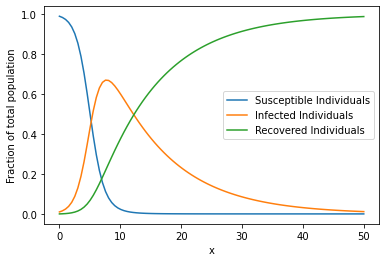

In [5]:
# Plot Result
fig = plt.figure()
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.plot(t, r, label = "Recovered Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.show()

## 1.5 Fitting the SIR Model 

The information in Table 1 was retrieved from an issue of the British Medical Journal (1978). In this issue there is an epidemiological case study about influenza in a British boarding school.

| Day        | 1 | 2 | 3 | 4  | 5  | 6   | 7   | 8   | 9   | 10  | 11  | 12 | 13 | 14 | 15 |
|------------|---|---|---|----|----|-----|-----|-----|-----|-----|-----|----|----|----|----|
| Infections | 1 | 3 | 6 | 25 | 73 | 222 | 294 | 258 | 237 | 191 | 125 | 69 | 27 | 11 | 4  |

The ```scipy.optimize.curve_fit``` method can be used to fit a function to data. ```curve_fit``` requires three inputs:
```python
scipy.integrate.curve_fit(func, xdata, ydata)
                       
```
* func: The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
* xdata: The independent variable where the data is measured.
* ydata: The dependent data.

In [6]:
from scipy.optimize import curve_fit

In [7]:
# Data
idata = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
idata = np.array(idata)
tdata = np.linspace(1,15, 15)

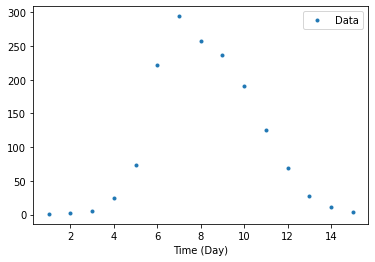

In [8]:
# Data Visualization
fig = plt.figure()
plt.plot(tdata, idata, '.', label = "Data")
plt.legend()
plt.xlabel('Infected')
plt.xlabel('Time (Day)')
plt.show()

In [9]:
# Variable Initialization

# N: Total population.
N = 763
fdata = idata / N

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 762
s0 = S0 / N

# R0: Number of recovered individuals at t = 0.
R0 = 0
r0 = R0 / N

y0 = s0, i0, r0

In [10]:
def fit_odeint(t, eta, mu):
    return odeint(fun, y0, t, args=(eta, mu))[:,1]

In [11]:
fit_odeint(tdata, eta, mu)

array([0.00131062, 0.0032165 , 0.00786687, 0.01908148, 0.0453761 ,
       0.10314691, 0.21357278, 0.37660973, 0.53993587, 0.64083117,
       0.66985978, 0.65276459, 0.61389573, 0.56718652, 0.51930662])

In [12]:
popt, pcov = curve_fit(fit_odeint, tdata, fdata)
eta, mu = popt
print("Eta: ", round(eta,4))
print("Mu: ", round(mu, 4))

Eta:  1.6638
Mu:  0.4452


In [13]:
reproductiveNumber = eta/mu
print("Reproductive Number: ", round(reproductiveNumber,4))

Reproductive Number:  3.7371


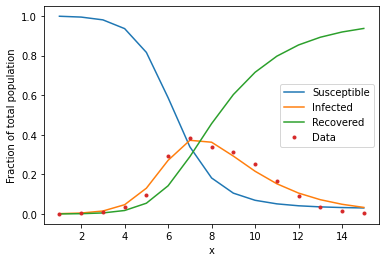

In [14]:
ret = odeint(fun, y0, tdata, args=(eta, mu))
s, i, r = ret.T

# Plot Result
fig = plt.figure()
plt.plot(tdata, s, label = "Susceptible")
plt.plot(tdata, i, label = "Infected")
plt.plot(tdata, r, label = "Recovered")
plt.plot(tdata, fdata, '.', label = "Data")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.show()

## Exercises

(a) Compute the numerical integration for the SI Model. Make a plot of the fraction of Susceptibles and Infected considering $N = 100$ , $I_0 = 1$ and $\beta \langle k \rangle = 0.3$ in a time frame from 0 to 50.  

In [15]:
# N: Total population.
N = 100

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 99
s0 = S0 / N

# Transmission Rate 
eta = 0.3

y0 = s0, i0

# Time points
t = np.linspace(0, 50, 100)

In [16]:
def fun(y, t, eta):
    s, i = y
    dsdt = -eta * s * i
    didt = eta * s * i 

    return dsdt, didt

# Initial conditions vector
# Integrate the SI equations over the time grid, t.
ret = odeint(fun, y0, t, args=(eta,))

s, i = ret.T


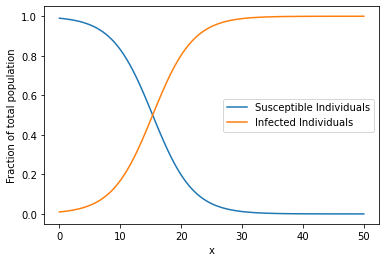

In [17]:
# Plot Result
fig = plt.figure()
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.show()

(b) Compute the numerical integration for the SIS Model. Make a plot of the fraction of Susceptibles and Infected considering $N = 100$, $I_0 = 1$, $\beta \langle k \rangle = 1$ and $\mu = 0.1$ in a time frame from 0 to 50.  

In [18]:
# N: Total population.
N = 100

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 99
s0 = S0 / N

# Transmission Rate and Recovery Rate
eta = 1.0
mu = 0.1 
 
y0 = s0, i0

# Time points
t = np.linspace(0, 50, 100)


In [19]:
def fun(y, t, eta, mu):
    s, i = y
    dsdt = -eta * s * i + mu * i
    didt = eta * s * i - mu * i

    return dsdt, didt

# Initial conditions vector
# Integrate the SIS equations over the time grid, t.
ret = odeint(fun, y0, t, args=(eta, mu))

s, i = ret.T

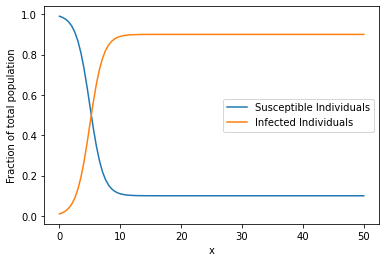

In [20]:
# Plot Result
fig = plt.figure()
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.show()

(c) Simulate the SIR dynamics on a random network with $N = 1000$ nodes and link probability $p = 0.01$. Initially 10 nodes are infected, chosen at random. The probability of recovery is $\mu = 0.5$. Run the dynamics for these values of the infection probability $\beta =$ 0.02, 0.05, 0.1, 0.2. In each run, save the number of simultaneously infected people after each iteration and calculate the maximum value. Additionally, present a plot with the node state proportions. Interpret the results. How many iterations are needed to reach the maximum? Do you observe a major outbreak? Why or why not? (Hint: Feel free to modify the code in this chapter’s tutorial to run the simulations.) In order to complete this task, consider the Chapter 7 Tutorial ([Link](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%207%20Tutorial.ipynb)) from the Mencszer et al. (2020) book.

In [21]:
%matplotlib inline
import networkx as nx

In [22]:
import random

# Initialize states
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patients_zero = random.sample(list(G.nodes), 10)

    for patient in patients_zero:
        state[patient] = 'I'
        
    return state


In [23]:
# State Functions 
def state_transition(G, current_state):
    next_state = {}
    sim_infected = 0
    for node in G.nodes:
        # current_state[node] == 'R' 
        if current_state[node] == 'R':
            continue
            
        # current_state[node] == 'I'
        elif current_state[node] == 'I':
            if random.random() < MU:
                next_state[node] = 'R'
            
        # current_state[node] == 'S' 
        else:
            for neighbor in G.neighbors(node):
                if current_state[neighbor] == 'I':
                    if random.random() < BETA:
                        next_state[node] = 'I'
                        sim_infected += 1
           
    return next_state, sim_infected

In [24]:
# Simulation Fuctions 
def run(G, steps=1):
    infected_list = []
    iter_values = []
    for _ in range(steps):
        infected_list.append(step(G))
        
        I_nodes = [1 if node[1] == 'I' else 0 for node in G.nodes(data = 'state')]
        S_nodes = [1 if node[1] == 'S' else 0 for node in G.nodes(data = 'state')]
        R_nodes = [1 if node[1] == 'R' else 0 for node in G.nodes(data = 'state')]
        iter_values.append([sum(S_nodes), sum(I_nodes), sum(R_nodes)])
        
    return max(infected_list), np.array(iter_values)
            
def step(G):
    state = nx.get_node_attributes(G, 'state')
    new_state, infected = state_transition(G, state)
    state.update(new_state)
    nx.set_node_attributes(G, state, 'state')
    
    return infected

def draw(t, s, i, r):
    fig = plt.figure()
    plt.plot(t, s, label = "Susceptible Individuals")
    plt.plot(t, i, label = "Infected Individuals")
    plt.plot(t, r, label = "Recovered Individuals")
    plt.legend()
    plt.ylabel('Fraction of total population')
    plt.xlabel('steps')
    plt.show()
    

The max values at 30 steps is 3


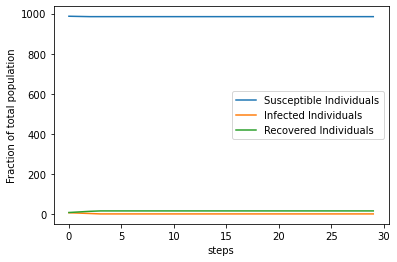

In [25]:
# Simulation 
MU = 0.5
BETA = 0.02
steps = 30

G = nx.gnp_random_graph(1000, 0.01)
nx.set_node_attributes(G, initial_state(G), 'state')
max_value, values = run(G, steps = steps)
print("The max values at {} steps is {}".format(steps, max_value))
draw(list(range(0,steps)), values[:,0], values[:,1], values[:,2] )

Considering a infecting rate at 0.02 and a recovery rate at 0.5, it is possible to see that there is no major outbreak since the transmission is low and the infected indivual recover fast enough so they do not infect anyone else. The maximun value of simultaneous infected indivudual is 2, it is possible to see the the number remainded the same after the 5th iteration. The epidemic is not a major threat in this case as the infected indivual would recover fast enough.

The max values at 30 steps is 5


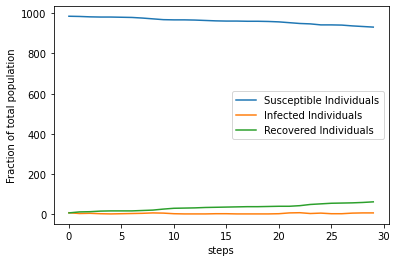

In [26]:
# Simulation 
MU = 0.5
BETA = 0.05

G = nx.gnp_random_graph(1000, 0.01)
nx.set_node_attributes(G, initial_state(G), 'state')
max_value, values = run(G, steps = steps)
print("The max values at {} steps is {}".format(steps, max_value))
draw(list(range(0,steps)), values[:,0], values[:,1], values[:,2] )

For the case that beta is 0.05, this means that the transmission is larger that in the last example, it requeired 5 iteration to reach the peak which is a infection of 10 simultaneous individuals, but after the small peak, the transmission remains flat and the epidemic could last for a long time and is not a major threat. 

The max values at 30 steps is 91


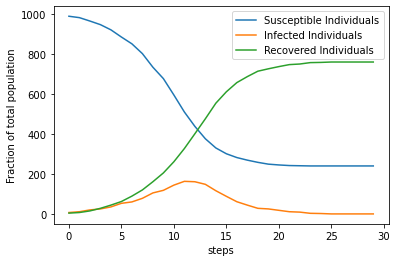

In [27]:
# Simulation 
MU = 0.5
BETA = 0.1

G = nx.gnp_random_graph(1000, 0.01)
nx.set_node_attributes(G, initial_state(G), 'state')
max_value, values = run(G, steps = steps)
print("The max values at {} steps is {}".format(steps, max_value))
draw(list(range(0,steps)), values[:,0], values[:,1], values[:,2] )

In this case the tranmission in at 0.1, but the epidemic curve is flattened due to the slow transmission that still occurs, the peak is more prominent than in the previous examples and accurs after the 10th step. For this case the epidemic lasts longer.  

The max values at 30 steps is 257


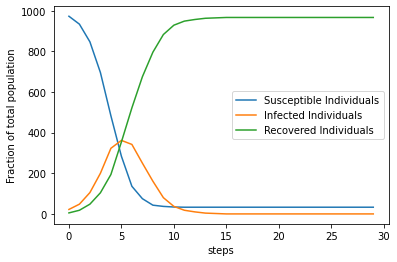

In [28]:
# Simulation 
MU = 0.5
BETA = 0.2

G = nx.gnp_random_graph(1000, 0.01)
nx.set_node_attributes(G, initial_state(G), 'state')
max_value, values = run(G, steps = steps)
print("The max values at {} steps is {}".format(steps, max_value))
draw(list(range(0,steps)), values[:,0], values[:,1], values[:,2] )

For this case the transmission is faster than the lasts examples, a peak is reached at 5 steps with a higher simultaneous transmission, this happen due to a larger value for beta, the epidemic lasts less time than in the previous example but can also mean a collapse in health sevices, since basicaly in the peak a quarter of the sample is infected. 

## References

[1] The SIR epidemic model: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/.

[2] Fitting the SIR model of disease to data in Python: https://numbersandshapes.net/post/fitting_sir_to_data_in_python/.

[3] F. Mencszer, S. Fortunato, C. A. Davis (2020). A First Course in Network Science.

[4] L. A. Barabasi (2016) Network Science. 